# Simple Linear Regression Using Gradient Descent

## Importing the necessary Libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.metrics import *

__Generating the data using the class make_regression__

In [17]:
X, y = make_regression(n_samples = 200, n_features = 1, n_informative = 1, n_targets = 1,noise= 10,random_state = 100)

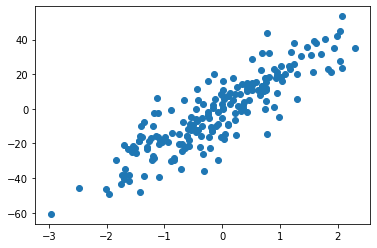

In [18]:
plt.scatter(X, y);

__Perform train test split__

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

__Making our own Linear Regression Class__

In [20]:
class LR_GD:
    
    def __init__(GDR,learning_rate,epochs):
        GDR.m = 100
        GDR.b = -120
        GDR.lr = learning_rate
        GDR.epochs = epochs
        
    def fit(GDR, X, y):
        # calcualte the b using GD
        for i in range(GDR.epochs):
            loss_slope_b = -2 * np.sum(y - GDR.m*X.ravel() - GDR.b)
            loss_slope_m = -2 * np.sum((y - GDR.m*X.ravel() - GDR.b)*X.ravel())
            
            GDR.b = GDR.b - (GDR.lr * loss_slope_b)
            GDR.m = GDR.m - (GDR.lr * loss_slope_m)
        print(GDR.m)
        print(GDR.b)
        
    def predict(GDR,X):
        return GDR.m * X + GDR.b
    

In [21]:
LR = LR_GD(0.001, 100)

In [22]:
LR.fit(X_train, y_train)

19.164366972567574
-0.6895013271319445


In [23]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)

In [24]:
# calculate r2score

print(" The r2_score for train using gradient descent class :", r2_score(y_train, y_pred_train))
print(" The r2_score for test using gradient descent class :", r2_score(y_test, y_pred_test))

 The r2_score for train using gradient descent class : 0.7562983888152416
 The r2_score for test using gradient descent class : 0.8276353840143443


### Check with sklearn LinearRegression class:

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
LR_1 = LinearRegression()

LR_1.fit(X_train, y_train)

LinearRegression()

In [27]:
y_lr_train = LR_1.predict(X_train)
y_lr_test = LR_1.predict(X_test)

In [28]:
# calculate r2score

print(" The r2_score for train using sklearn LR class :", r2_score(y_train, y_lr_train))
print(" The r2_score for test using sklearn LR class :", r2_score(y_test, y_lr_test))

 The r2_score for train using sklearn LR class : 0.7562983888152415
 The r2_score for test using sklearn LR class : 0.8276353840143439


In [29]:
print("The coeffients are : ", LR_1.coef_)
print("The intercepts are : ", LR_1.intercept_)

The coeffients are :  [19.16436697]
The intercepts are :  -0.6895013271318624


## Visualizing the Best Fit Line

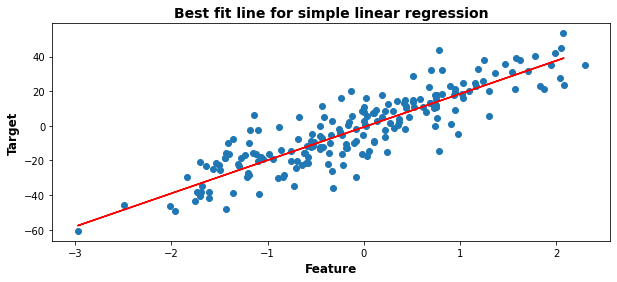

In [30]:
plt.figure(figsize=(10,4))
plt.scatter(X, y)
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title("Best fit line for simple linear regression",  fontweight = "bold", fontsize =14)
plt.xlabel('Feature', fontweight = "bold", fontsize =12)
plt.ylabel('Target' , fontweight = "bold", fontsize =12);

__The red line in the graph represents the best fit line.__

### Here, the r2_scores calculated using the class defined by our own and the sklearn Linear Regression class are same. 
### And, the coeffients and intercepts are also same. 
### Therefore, we have developed our own Linear Regression model using Gradient Descent.